## <font color=blue> Calculus - Shapes and data points for 2D shapes

This is part of the series of math algorithms to define 2D shapes as math objects.



### <font color=blue> Problem: 
Create math (and Python) objects based on certain specifications.
* Section 1. Circles
* Section 2. Lines 
* Section 2. Arcs



## <font color=purple> SECTION 1: Circles

### <font color=blue>1a. Create Circle Object

In [1]:
# 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
pi = math.pi

class Circle:
    def __init__(self,name='Circle', r=2, n=0, xc=0, yc=0, c='r'):              # includes default values
        self.name = name                # name of object
        self.r = r                      # radius of circle
        self.xc = xc                    # center of circle (x value)
        self.yc = yc                    # center of circle (y value)
        self.color = c                  # color of circle
        
        # Adjust default on n (the number of points)
        self.n = n                      # number of data points in circumference
        if self.n == 0:         # if zero points (the default), generate n = 20 * radius as default
            self.n = int(self.r)*20

        # Calculate circumference data points based on radius (r) and center coordinates (xc,yc)
        x_list = [self.xc + 
                       math.cos(2*pi/self.n*x)*self.r for x in range(0,self.n+1)] # circumference x values
        self.x_list = [float(np.format_float_scientific(x, precision=4, unique=False,  trim='k')) for x in x_list]  # convert to 4 significant figures 
        y_list = [self.yc +
                       math.sin(2*pi/self.n*x)*self.r for x in range(0,self.n+1)] # circumference y values
        self.y_list = [float(np.format_float_scientific(y, precision=4, unique=False,  trim='k')) for y in y_list]  # convert to 4 significant figures        

        # Calculate area
        c_area = pi*self.r**2
        self.c_area = float(np.format_float_scientific(c_area, precision=4, unique=False,  trim='k'))  # convert to 4 significant figures
        
    def circum(self):
        self.circum = [(x,y) for x,y in zip(self.x_list,self.y_list)]   # convert list of tuples
        return self.circum
    def area(self):
        return self.c_area
    def center(self):
        return (self.xc, self.yc)
    def image(self):
        plt.style.use('ggplot')
        plt.title(self.name, loc='center', fontsize=18)
        plt.scatter(self.x_list, self.y_list, color=self.color)
        plt.scatter(self.xc,self.yc, color=self.color)
        ctr_note= 'Center (' + str(self.xc) +',' + str(self.yc)+  ')'
        plt.annotate(ctr_note, [self.xc, self.yc], ha='center',textcoords="offset points",xytext=(200,0),
            arrowprops=dict(facecolor='black', shrink=0.02)) 
        
        return
    def __repr__(self):                                      # added method for print
        return 'Circle: name = %s, radius = %s, points = %s, center = (%s, %s), area= %s ' % (self.name, 
                        self.r, self.n, self.xc, self.yc, self.c_area)

### <font color=blue>1b. Create Circle Instance (for testing)

Circle: name = Circle1, radius = 2, points = 80, center = (4, 1), area= 12.566 


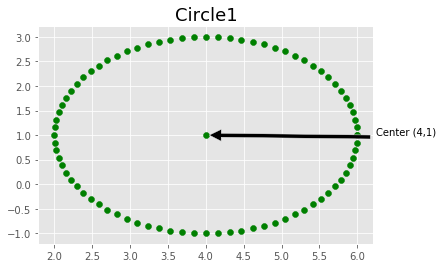

Circumference data points, (x,y) values: [(6.0, 1.0), (5.9938, 1.1569), (5.9754, 1.3129), (5.9447, 1.4669), (5.9021, 1.618), (5.8478, 1.7654), (5.782, 1.908), (5.7053, 2.045), (5.618, 2.1756), (5.5208, 2.2989), (5.4142, 2.4142), (5.2989, 2.5208), (5.1756, 2.618), (5.045, 2.7053), (4.908, 2.782), (4.7654, 2.8478), (4.618, 2.9021), (4.4669, 2.9447), (4.3129, 2.9754), (4.1569, 2.9938), (4.0, 3.0), (3.8431, 2.9938), (3.6871, 2.9754), (3.5331, 2.9447), (3.382, 2.9021), (3.2346, 2.8478), (3.092, 2.782), (2.955, 2.7053), (2.8244, 2.618), (2.7011, 2.5208), (2.5858, 2.4142), (2.4792, 2.2989), (2.382, 2.1756), (2.2947, 2.045), (2.218, 1.908), (2.1522, 1.7654), (2.0979, 1.618), (2.0553, 1.4669), (2.0246, 1.3129), (2.0062, 1.1569), (2.0, 1.0), (2.0062, 0.84308), (2.0246, 0.68713), (2.0553, 0.53311), (2.0979, 0.38197), (2.1522, 0.23463), (2.218, 0.092019), (2.2947, -0.044997), (2.382, -0.17557), (2.4792, -0.2989), (2.5858, -0.41421), (2.7011, -0.52081), (2.8244, -0.61803), (2.955, -0.70528), (3.092

In [2]:
if __name__ == '__main__':                           # testing only (not execute if called)
    circle_1 = Circle(name='Circle1', r=2,xc=4, yc=1, n=80, c='g')     # Create object (circle)
    print(circle_1)                                  # print key features of bject

    circle_1.image()                                 # Create image
    plt.show()                                       # Show image
    print('Circumference data points, (x,y) values:', circle_1.circum())

## <font color=purple> SECTION 2: Lines and Vectors

### <font color=blue>2a. Create Line and Vector Object

In [3]:
# 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


class Line:
    def __init__(self,name='Line', start = (0,0), end = (0,0),c='r'):              # includes default values
        self.name = name                # name of object
        self.start = start              # Line starting coordinates (x1,y1)
        self.end = end                  # Line ending coordinates (x2,y2)
        self.color = c                  # Color of line for plot
        
        # Generate length of line
        len = math.sqrt((start[0]-end[0])**2 + (start[1]-end[1])**2)   # sqrt of ((x1-x2)**2 + (y1-y2)**2)
        self.len = float(np.format_float_scientific(len, precision=4, unique=False,  trim='k'))  # convert to 4 significant figures 
       
        # Generate slope of line (change of y / change of x)
        l_slope = (self.start[1]-self.end[1]) / (self.start[0] - self.end[0])
        self.l_slope = float(np.format_float_scientific(l_slope, precision=4, unique=False,  trim='k'))  # convert to 4 significant figures 
        
        # Generate number of datapoints 
        self.n = int(len * 2)                  # number of points: 20 * len of line
        
        # Calculate the y_intercept.  y = mx + b --> b = y - mx   (where b is the y_intercept)
        self.b1 = self.start[1] - self.l_slope * self.start[0]     
        
        # Generate points for line
        x_incr = abs(start[0]-end[0]) / self.n    # len of x side divided by number of points 
        if start[0] > end[0]: x_incr = -x_incr        #  neg increments if x_start > x_end
        x_list = [self.start[0] + x_incr*x_idx  for x_idx in range(0, self.n+1)]  # these are x values
        self.x_list = [float(np.format_float_scientific(x, precision=4, unique=False,  trim='k')) for x in x_list]  # convert to 4 significant figures 
        # calculate y values based on y = mx + b
        y_list = [self.l_slope*x + self.b1 for x in x_list]
        self.y_list = [float(np.format_float_scientific(y, precision=4, unique=False,  trim='k')) for y in y_list]  # convert to 4 significant figures    
       
    def slope(self):
        return self.l_slope
    def length(self):
        return self.len
    def datapoints(self):               # provide list of datapoints, (x,y) tuples
        self.datapoints = [(x,y) for x,y in zip(self.x_list,self.y_list)]   # convert list of tuples
        return self.datapoints
    def image(self): 
        plt.style.use('ggplot')
        plt.title(self.name, loc='center', fontsize=18)        
        str_note= 'Start ' + str(self.start)
        end_note= 'End ' + str(self.end)
        plt.xlabel('x', fontsize = 14, color='black')
        plt.ylabel('y', fontsize = 14, color='black')
        plt.annotate(str_note, self.start, ha='center',textcoords="offset points",xytext=(200,0),
                    arrowprops=dict(facecolor='black', shrink=0.02)) 
        plt.annotate(end_note, self.end,textcoords="offset points",xytext=(200,0), ha='center', 
                     arrowprops=dict(facecolor='black', shrink=0.02))
        plt.scatter(self.x_list, self.y_list, color=self.color)
        
        return
    def __repr__(self):                                      # added method for print
        return 'Line: name = %s, start = %s, end = %s, length = %s, slope = %s, y_intercept = %s  ' % (self.name, 
            self.start, self.end, self.len, self.l_slope, self.b1)
        

### <font color=blue>2b. Create Line and Vector Instance (for testing)

Line: name = Line1, start = (2, 5), end = (-2, -3), length = 8.9443, slope = 2.0, y_intercept = 1.0  


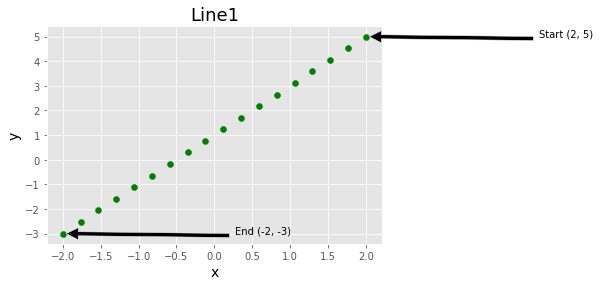

Line data points, (x,y) values: [(2.0, 5.0), (1.7647, 4.5294), (1.5294, 4.0588), (1.2941, 3.5882), (1.0588, 3.1176), (0.82353, 2.6471), (0.58824, 2.1765), (0.35294, 1.7059), (0.11765, 1.2353), (-0.11765, 0.76471), (-0.35294, 0.29412), (-0.58824, -0.17647), (-0.82353, -0.64706), (-1.0588, -1.1176), (-1.2941, -1.5882), (-1.5294, -2.0588), (-1.7647, -2.5294), (-2.0, -3.0)]


In [4]:
if __name__ == '__main__':                           # testing only (not execute if called)
    line_1 = Line(name='Line1', start = (2,5), end = (-2,-3), c='g')   # Create line (or vector)
    
    print(line_1)                         # Print line characteristics
    
    line_1.image()                        # Create plot
    plt.show()                            # Show plot
    
    print('Line data points, (x,y) values:', line_1.datapoints())


## <font color=purple> SECTION 3: Arcs

## <font color=blue>3a. Create Arc Object

### <font color=blue>3b. Create Arc Instance (for testing)